# Hands-on Workshop: AI Agents with Tool Use using Gemini

Welcome to this hands-on workshop! In this notebook, we will explore how to build an AI Agent capable of using tools (Function Calling) using Google's Gemini API.

# Introduction:
In the context of agentic AI, tools are external capabilities the LLM can invoke, for example:
*   APIs
*   Database queries
*   Internal services
*   Third-party systems
*   Internal functions written in code

They turn the LLM from something that just talks into something that can act.

Remember, LLMs on their own are stateless, have no access to real-time systems, and can’t take action.

# But Give Them Tools, and They Can:
*  Fetch data from your internal systems
*  Trigger events (e.g., send an email, create a JIRA ticket)
*  Access structured data like calendars, dashboards, or CRMs
*  Run pre-written logic based on business rules

*This is how generation turns into execution.*

## What we will build
We will create a simple agent that can:
1. Answer general questions.
2. Perform mathematical calculations using a defined tool.
3. Retrieve "live" information (mocked) using a defined tool.

# Why Tools Matter

1.   **They unlock execution**: Without tools, your agent is just an assistant that makes suggestions. With tools, it can complete $workflows^*$ end-to-end.
2.   **They increase precision**: Rather than hallucinating, the LLM can ask the right system directly — “What’s the actual order status?” instead of making up a delay reason.
3. **They let you control risk**: You define what’s exposed. The LLM can’t do anything outside of the tools you register.
4. **They enable composability**: If you want to combine your CRM, calendar, and email stack into one assistant, you can expose each of those as tools and let the LLM orchestrate them.

## Prerequisites
You need a Google AI Studio API Key. If you don't have one, get it here: https://aistudio.google.com/app/apikey

Make sure you add it in the colab secrets manager.


* A workflow is a recipe an agent uses for task completion. It is a structured, predefined sequence of multiple steps and uses tools to take decisions autonomously. Example: Travel booking, data extraction, sending birthday emails. ***n8n*** is the platform that hosts and runs workflows.

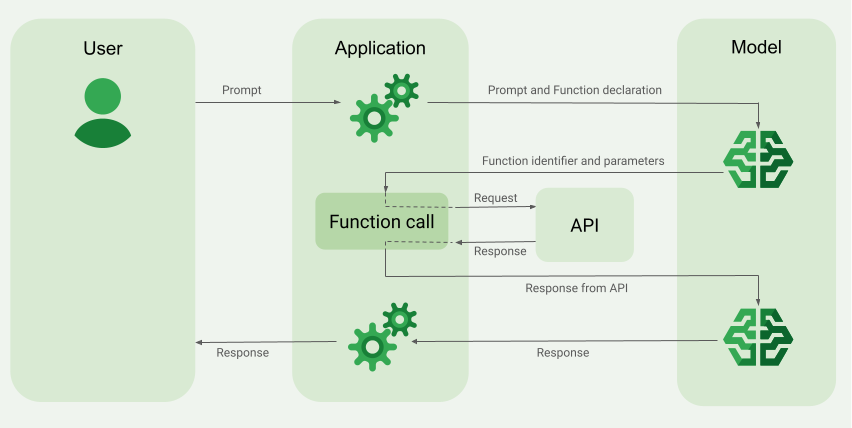

This image illustrates the concept of **Function Calling** in AI models. It depicts how: -

* An AI agent can interpret a user's prompt

* Identify the need for an external tool or function to answer the query.

* Execute that function with the appropriate arguments

* Receive the result and then use that result to formulate a comprehensive response back to the user.

This process allows the AI (LLM) to interact with external systems and perform actions beyond its core conversational capabilities.

What is Agentic AI, and how can we use it?

Most AI we encounter today is what we call "passive" or "reactive" AI. It responds to our prompts and requests. Think of asking your smart speaker to play a song or a chatbot answering your customer service questions. They’re helpful, sure, but they’re fundamentally waiting for us to tell them what to do.

Agentic AI, on the other hand, can plan, execute and come up with a multi-step tasks to accomplish a user goal.

## 0. Setup and Configuration
First, let's install and import the library and configure your API key.

Recommendation: Please use the Colab Secrets Manager

[Student Hit with a 55,444.78$ bill for leaking Gemini API Key](https://www.reddit.com/r/googlecloud/comments/1noctxi/student_hit_with_a_5544478_google_cloud_bill/)

In [ ]:
# Install the necessary library
!pip install google-ai-generativelanguage

# Import the Libraries

In [ ]:
#Import the Libraries
#  - google.generativeai (For the Gemini API)
#  - userdata from google.colab (For API Key Management)
# Get API key from Colab secrets manager (Use the get method from the userdata object)
# Configure the genai library by configure(api_key=<Insert API Key>) from genai

In [ ]:
# Create a sample model object
# - Use the genai.GenerativeModel with the model as gemma-3-27b-it and create a model object
# - Call the generative_content method on the model object with the prompt - "What is AI?"
# - Print the Textual Response from the response object

## 1. Define Tools

Tools are simply Python functions that the model can "call". We need to define these functions and provide clear docstrings so the model understands when and how to use them.

In [ ]:
def add(a: float, b: float) -> float:
    """Adds two numbers.

    Args:
        a: The first number.
        b: The second number.

    Returns:
        The sum of a and b.
    """
    print(f"[Tool defined in AI Summit] Calling add({a}, {b})")
    # Add Logic Here

def multiply(a: int, b: int) -> int:
    """Multiplies two numbers.

    Args:
        a: The first number.
        b: The second number.

    Returns:
        The product of a and b.
    """
    print(f"[Tool defined in AI Summit] Calling multiply({a}, {b})")
    # Add Logic Here

def get_weather(city: str) -> str:
    """Get the current weather for a given city.

    Args:
        city: The name of the city.

    Returns:
        A string describing the weather.
    """
    print(f"[Tool defined in AI Summit] Calling get_weather('{city}')")
    # Mock data for demonstration
    weather_data = {
        "Bangalore": "Windy, 17°C",
        "Kolkata": "Windy, 28°C",
        "Chennai": "Sunny, 32°C",
        "Hyderabad": "Sunny, 30°C"
    }
    # Add Logic Here - Use the get method from the weather_data dictionary
    # Default - Weather Data not Available

import random
def get_stock_price(ticker: str) -> float:
    """Gets the current stock price for a given ticker symbol.

    Args:
        ticker: The stock ticker symbol (e.g., 'GOOG', 'AAPL', 'MSFT').

    Returns:
        A simulated current stock price for the given ticker.
    """
    print(f"[Tool defined in AI Summit] Calling get_stock_price('{ticker}')")
    # Simulate stock prices for demonstration purposes
    mock_prices = {
        "GOOG": 175.50,
        "AAPL": 215.25,
        "MSFT": 450.70,
        "AMZN": 180.90,
        "NVDA": 190.00
    }
    # Get the Stock Price by using the get method
    # To Spice It Up a Bit - Add some randomness to the output :)
    # round(price * (1 + (random.random() - 0.5) * 0.05), 2)

def calculate_indian_income_tax(taxable_income: float, regime: str) -> float:
    """Calculates the income tax for an employee in India based on taxable income and tax regime.
    Args:
        taxable_income: The total taxable income.
        regime: The chosen tax regime ('new' or 'old').
    Returns:
        The calculated income tax.
    Raises:
        ValueError: If an invalid tax regime is provided.
    """
    print(f"[Tool] Calling calculate_indian_income_tax({taxable_income}, '{regime}')")
    tax = 0.0
    if regime == 'new':
        if taxable_income <= 1200000:
            tax = 0
        elif taxable_income <= 1600000:
            tax = (taxable_income - 1200000) * 0.15
        elif taxable_income <= 2000000:
            tax = (400000 * 0.15) + (taxable_income - 1600000) * 0.20
        elif taxable_income <= 2400000:
            tax = (400000 * 0.15) + (400000 * 0.20) + (taxable_income - 2000000) * 0.25
        else:
            tax = (400000 * 0.15) + (400000 * 0.20) + (400000 * 0.25) + (taxable_income - 2400000) * 0.30
    elif regime == 'old':
        if taxable_income <= 250000:
            tax = 0
        elif taxable_income <= 500000:
            tax = (taxable_income - 250000) * 0.05
        elif taxable_income <= 1000000:
            tax = 12500 + (taxable_income - 500000) * 0.20
        else:
            tax = 112500 + (taxable_income - 1000000) * 0.30
    else:
        raise ValueError("Invalid tax regime. Choose 'new' or 'old'.")

    return tax


## 2. View Current Available Models

We can use the list_models() to see the list of available models and their supported methods. Few of the methods that exist are: -

* name
* supported_generation_methods

In [ ]:
for model in genai.list_models():
  print(model.name)

models/embedding-gecko-001
models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image-preview
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview

In [ ]:
import pprint
for model in genai.list_models():
  if 'generateContent' in model.supported_generation_methods:
    pprint.pprint(model)

Model(name='models/gemini-2.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 2.5 Flash',
      description=('Stable version of Gemini 2.5 Flash, our mid-size multimodal model that '
                   'supports up to 1 million tokens, released in June of 2025.'),
      input_token_limit=1048576,
      output_token_limit=65536,
      supported_generation_methods=['generateContent',
                                    'countTokens',
                                    'createCachedContent',
                                    'batchGenerateContent'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)
Model(name='models/gemini-2.5-pro',
      base_model_id='',
      version='2.5',
      display_name='Gemini 2.5 Pro',
      description='Stable release (June 17th, 2025) of Gemini 2.5 Pro',
      input_token_limit=1048576,
      output_token_limit=65536,
      supported_generation_methods=['generateContent',
                  

### 3. Initialize the Model - Prompt Version

In [ ]:
# Create a chat session
# Initialize Model with Generative AI
model = genai.GenerativeModel(
    model_name='gemma-3-27b-it'
)
# Start a chat session with the model initialized above
chat = model.start_chat()

In [ ]:
import json
def postProcessResponse(response):
  # Load the JSON Object String using loads()
  # Extract the function_name from the JSON Parsed Object
  # Extract the arguments from the JSON Parsed Object
  # Get the function object from the defined global symbols in the notebook.
  # Call the function with the arguments passed
  pass

def getOutput(task):
  # Define the Prompt Here that will let the LLM output the required tool to call
  # Use the send_message() method of the chat session object to send the prompt
  # Return the output
  return {'text':"ABC"}

In [ ]:
response = getOutput("What is the current stock price of NVIDIA(NVDA)?")

In [ ]:
response = getOutput("What is the weather like at Bangalore?")

In [ ]:
response = getOutput("Calculate the Indian income tax for a taxable income of 1800000 under the new regime.")

In [ ]:
response = getOutput("If I buy 2 apples at $1.5 each and 3 oranges at $2 each, how much is the total?")

### Easier Alternative: Pass the Function Names as a list and let the LLM call the appropriate function 😀

In [ ]:
# Add the tools to a list
# Initialize Model with Generative AI
# Start a chat session with automatic function calling enabled

## 4. Interact with the Agent

Now we can send messages to the chat session. If the model decides it needs to use a tool to answer, it will automatically call the Python function and use the result.

In [ ]:
response = chat.send_message("What is the current stock price of Google (GOOG)?")

[Tool defined in AI Summit] Calling get_stock_price('GOOG')


In [ ]:
response = chat.send_message("What is 57 multiplied by 3?")

[Tool defined in AI Summit] Calling multiply(57.0, 3.0)


In [ ]:
response = chat.send_message("What is the weather like in Bangalore today?")

[Tool defined in AI Summit] Calling get_weather('Bangalore')


In [ ]:
response = chat.send_message("If I buy 2 apples at $1.5 each and 3 oranges at $2 each, how much is the total?")

TooManyRequests: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 5, model: gemini-2.5-flash
Please retry in 46.114582988s.

In [ ]:
response = chat.send_message("Calculate the Indian income tax for a taxable income of 1800000 under the new regime.")

## 5. Exploring the Conversation History

You can inspect the chat history by iterating through the `chat.history` object, which stores the entire conversation, including user prompts, model responses, and any tool calls/responses.

*   `for content in chat.history:`: This loop goes through each turn of the conversation stored in `chat.history`.
*   `part = content.parts[0]`: Each `content` object can have multiple `parts`. For simplicity, this line accesses the first part of the current conversation turn.
*   `print(f"Role: {content.role}")`: This prints the role of the current `content` entry, indicating whether it's from the 'user' or the 'model'.
*   `if part.function_call:`: This checks if the current part contains a `function_call`. This happens when the model decides to invoke a tool.
    *   `print(f"Function Call: {part.function_call.name}{dict(part.function_call.args)}")`: If it's a function call, it prints the name of the function that was called and its arguments.
*   `elif part.function_response:`: This checks if the current part contains a `function_response`. This occurs when the result of a tool execution is fed back to the model.
    *   `print(f"Function Response: {part.function_response.response}")`: If it's a function response, it prints the output received from the tool.
*   `else:`: If the part is neither a function call nor a function response, it's considered regular text content.
    *   `print(f"Text: {part.text}")`: This prints the textual content of the message.
*   `print("-" * 20)`: This simply prints a separator line to make the output for each conversation turn more readable.

In essence, it can help you visualize the flow of interaction, showing when the AI thought it needed a tool, what tool it called, what the tool returned, and what the AI said in response.

### 6. Quick Word of Caution

Google announced a Gen AI SDK that can be used to do major of the tasks that we did. Also, the new API has limited support and older API will be deprecated. Google has documented all the steps of what is the code before and after the library.

[Migration to GenAI SDK](https://ai.google.dev/gemini-api/docs/migrate)

In [ ]:
# pip install -U -q "google-genai"

In [ ]:
# Chat Session
# from google import genai
# client = genai.Client()
# chat = client.chats.create(model='gemini-2.0-flash')
# response = chat.send_message(
#     message='Tell me a story in 100 words')
# response = chat.send_message(
#     message='What happened after that?')

In [ ]:
# Function Calling
# from google import genai
# from google.genai import types
# client = genai.Client()

# def get_current_weather(city: str) -> str:
#     return "23C"

# response = client.models.generate_content(
#   model='gemini-2.0-flash',
#   contents="What is the weather like in Boston?",
#   config=types.GenerateContentConfig(
#       tools=[get_current_weather]
#   ),
# )

# Real-Life Example - AI Driven Student Email Automation Script from csv content

# Automated Attendance Monitoring & Email Generation Using Gemini API

This notebook demonstrates an end-to-end workflow for automating attendance monitoring and generating personalized email alerts for students falling below a required attendance threshold. The workflow:

    - Accepts CSV content pasted directly in the script or input
    - Accepts a natural-language instruction
    - Uses OpenAI API to extract:
        * Required action
        * Attendance condition
        * Email body
    - Filters students based on attendance threshold
    - Sends emails to parents

In [ ]:
!pip install google-genai # This installs the Google Generative AI client library.
# After installation, you'll typically use genai.configure(api_key=YOUR_API_KEY) to authenticate your access to the Gemini API.

In [ ]:
import google.generativeai as genai
import json

In [ ]:
""" An API (Application Programming Interface) is an encrypted string that identifies a
    Google Cloud project for quota, billing and monitoring purposes."""
from google.colab import userdata
GEMINI_API_KEY=userdata.get("GEMINI_API_KEY")

In [ ]:
# Configures the client by authenticating it to use google.generativeai library within the session.
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
system_prompt= """From the provided dataset, identify all the students whose attendance is below 75%. For each of these students,
                    provide the following details in the specified format:
                    - Student Name: {Student Name}
                    - Roll No.: {Student Number}
                    - Parent Email: {Parent Email}
                    - Proctor Email: {Proctor Email}
                    - Email Body: {Email Body}

                    Compose a professional email adressed to parents or gaurdians of these students. the email should:
                    - Begin with a polite greeting and clearly state the purpose of the email.
                    - Inform the parents that their ward is falling behind due to attendance.
                    - Emphasize the importance of improving attednance immediately to ensure academic success.
                    - Be polite yet firm, encouraging parents to actively suport their child's regular attendance.
                    - Include the proctor's name and email in the maessage, encouraging the parents to reach out to the
                      proctor to schedule an in-person meeting at their earliest mutual convenience.
                    - Convey urgency and concern while remaining respectful and professional.
                    - End with a call to action, prompting parents to take immediate steps to address the issue.

                    Use the following placeholders in the email body:
                    - {Student Name} for the student's name.
                    - {Roll Number} for the student's roll number.
                    - {Attendance Percentage} for the student's attendance percentage.
                    - {Proctor's Name} for the proctor's name.
                    - {Proctor's email} for the proctor's email.
                """

read more on system instructions from here: https://docs.cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/system-instructions

In [ ]:
for m in genai.list_models():
    print(m.name)

models/embedding-gecko-001
models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image-preview
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview

In [ ]:
# Initializes a generative AI model from the Google Generative AI library.
model = genai.GenerativeModel(
    # We will use a free version like gemma-3-27b-it.
    # It is suitable for tasks such as answering questions and summarizing text.
    model_name="gemma-3-27b-it",
    # The 'system_instruction' argument provides a system prompt to guide the model's behavior.
    # This prompt sets the context and instructs the model on how to process the input
    # and format its output, e.g., to extract student data and compose emails as defined in 'system_prompt'.
    system_instruction=system_prompt
)

In [ ]:
# This variable, `csv_content`, holds our student dataset.
# For this demonstration, we're embedding the CSV data directly as a multi-line string
# instead of loading it from a file. This simplifies the setup for our class example.
# Each line represents a student record, and the first line is the header defining the columns.
csv_content = """Student Roll Number,Student Name,Gender,CGPA,Date of Birth,Courses,Marks in Each Course,Attendance Percentage,Proctor Name,Proctor Email,Parent Email
CSAI001,Rohan Sharma,M,8.2,2003-02-11,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;78;85;80;75",88,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI002,Ananya Gupta,F,9.1,2003-07-29,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","90;92;89;94;88",95,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI003,Arvind Menon,M,7.5,2002-12-09,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;68;75;65",72,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI004,Priya Iyer,F,8.8,2003-04-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;85;90;87;89",97,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI005,Vikram Reddy,M,6.9,2002-11-30,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","60;58;62;55;57",68,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI006,Neha Kulkarni,F,9.3,2003-06-18,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","92;94;90;95;91",99,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI007,Aditya Nair,M,7.8,2003-01-25,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","74;77;79;72;70",82,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI008,Sana Khan,F,8.5,2002-10-17,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","86;82;84;88;83",90,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI009,Harshit Verma,M,7.2,2003-05-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","68;65;70;72;66",74,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI010,Divya Suresh,F,8.9,2003-03-09,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","90;87;91;89;88",96,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI011,Karthik Raman,M,8.1,2003-02-22,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","80;82;81;83;79",89,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI012,Aishwarya Patil,F,7.9,2002-09-19,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","75;78;74;72;71",85,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI013,Manoj Sen,M,6.5,2003-07-02,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","55;58;60;52;50",70,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI014,Simran Kaur,F,9.0,2003-01-11,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","91;93;90;92;89",98,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI015,Rahul Chatterjee,M,8.4,2002-08-28,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","83;80;85;82;81",87,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI016,Nisha Mukherjee,F,7.1,2002-06-16,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","65;67;69;70;63",73,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI017,Ritesh Jain,M,8.6,2003-03-03,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;84;86;90;85",92,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI018,Swati Deshmukh,F,7.4,2002-12-21,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","72;74;70;68;69",76,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI019,Arjun Pillai,M,9.2,2003-10-10,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","94;91;92;93;95",99,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI020,Isha Rathod,F,8.0,2003-05-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;80;78;79;77",84,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI021,Tejas Gowda,M,7.6,2003-06-07,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;75;73;68",71,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI022,Ragini Singh,F,9.4,2003-02-03,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","95;94;96;93;92",100,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI023,Shivam Malhotra,M,6.8,2002-09-01,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","58;55;60;62;57",69,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI024,Harini Sekar,F,8.7,2003-11-19,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","87;89;88;90;85",94,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI025,Rehan Qureshi,M,7.0,2003-01-15,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","65;63;68;70;66",72,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI026,Anjali Dutta,F,8.3,2003-03-27,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","84;86;83;82;80",91,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI027,Kunal Thakur,M,7.3,2002-10-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","69;72;71;70;68",74,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI028,Mansi Reddy,F,9.0,2003-07-23,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","92;90;93;91;89",97,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI029,Amit Dubey,M,6.7,2002-08-12,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","58;60;55;57;59",65,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI030,Pooja Bansal,F,8.2,2003-04-06,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;84;80;83;81",89,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI031,Nitin Arora,M,7.9,2003-09-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","78;76;79;77;75",77,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI032,Sonali Jadhav,F,8.6,2003-08-30,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;86;87;89;85",93,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI033,Yash Mittal,M,6.9,2002-12-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","62;60;64;61;63",69,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI034,Keerthi Menon,F,9.1,2003-11-27,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","93;94;92;90;91",98,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI035,Adarsh Jena,M,7.4,2002-07-16,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;68;69;71",73,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
"""

![image.png](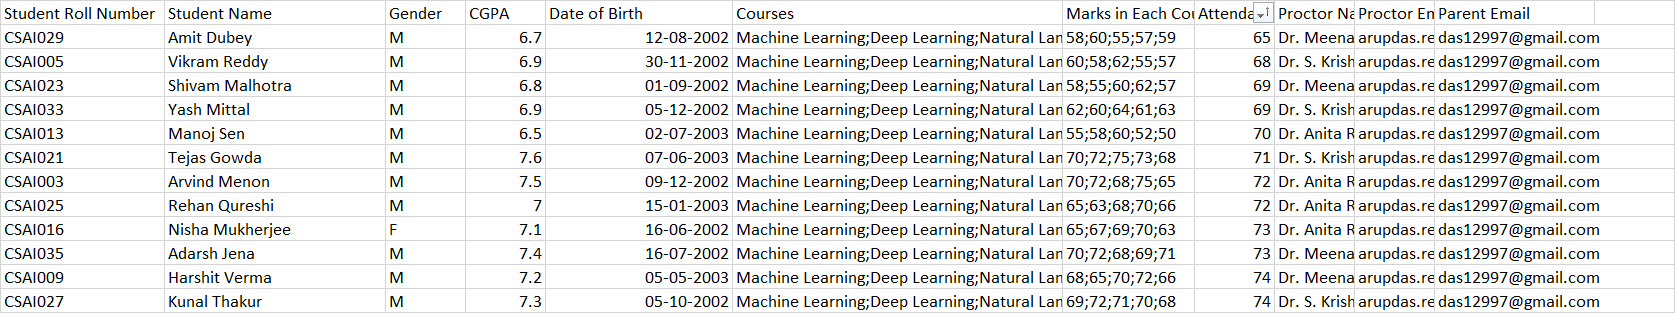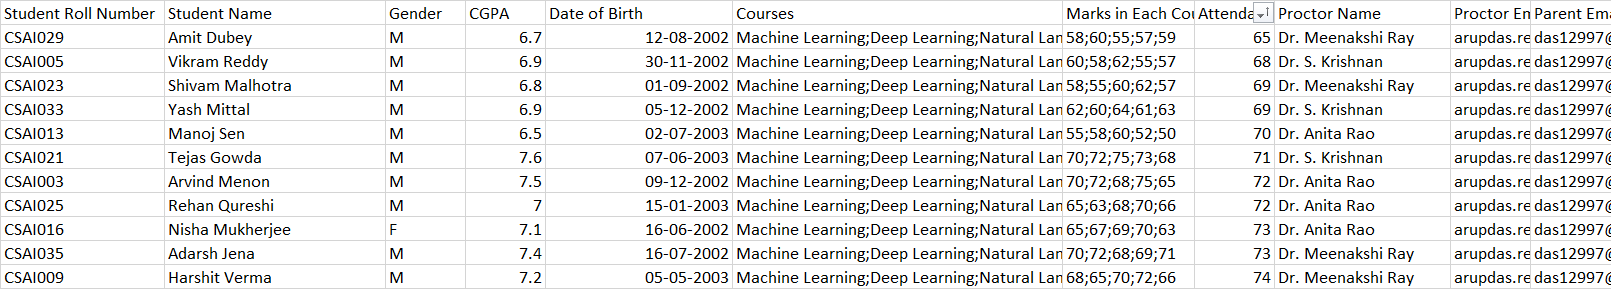)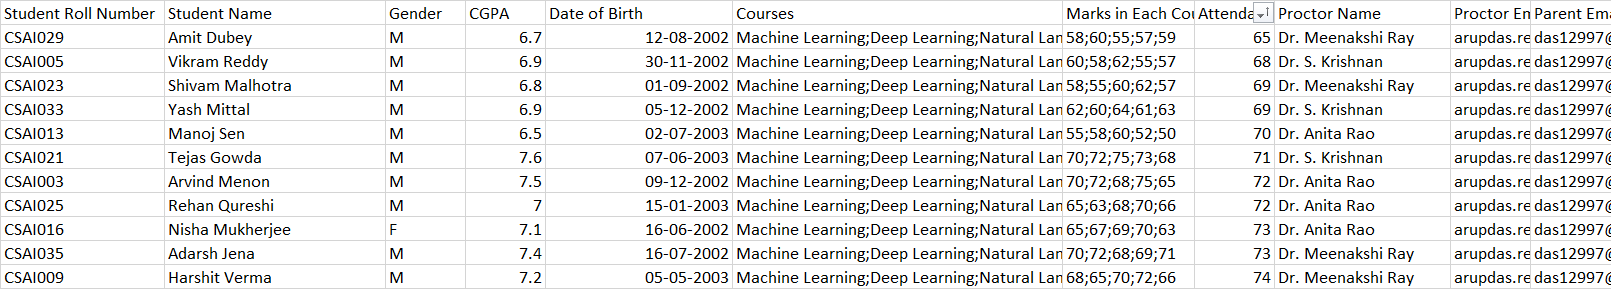

In [ ]:
# This `user_prompt` variable is crucial because it's the specific instruction we give to our Generative AI model.
# It combines two main parts:
# 1.  The `csv_content`: This is the raw student data we defined earlier, which the AI needs to process.
# 2.  The Instruction: This tells the AI *what to do* with the data.
#
# In this case, the instruction is to:
#   -  Find all students whose 'Attendance Percentage' is below 75%.
#   -  Format the output as a JSON object, specifically with an `action` of "send_email",
#      an `attendance_threshold` of 75, an `email_body` (which the AI will generate based on the system prompt),
#      and a list of `students` who meet the criteria.
#
# This structured approach helps ensure the AI understands exactly what information to extract
# and how to present it, making it easier for our Python code to parse and use the AI's output.
user_prompt = f"""Below is student dataset in CSV format.

                  {csv_content}

                  Your task:
                  Extract all students with attendance < 75% and produce structured JSON:
                  {{
                      "action": "send_email",
                      "attendance_threshold": 75,
                      "email_body": "...",
                      "students": [ ... ]
                  }}
              """

In [ ]:
# This line sends the 'user_prompt' (which contains the CSV data and instructions) to the
# generative AI model (initialized as 'model'). The model processes this input and
# generates a response. The entire response object is stored in the 'response' variable.


In [ ]:
# Let's view the response returned by the Gemini Model

Summary structure of response:
```
GenerateContentResponse
└── done: True
└── iterator: None
└── result
    └── candidates [1]
        └── candidate 0
            ├── content
            │   └── parts [1]
            │       └── part 0
            │           └── text (JSON block)
            │               ├── action: "send_email"
            │               ├── attendance_threshold: 75
            │               ├── email_body: "<template body>"
            │               └── students [12]
            │                   ├── Student 1
            │                   │   ├── Student Name
            │                   │   ├── Roll No.
            │                   │   ├── Parent Email
            │                   │   ├── Proctor Email
            │                   │   └── Email Body
            │                   ├── Student 2
            │                   │   └── (same structure)
            │                   ├── Student 3
            │                   ├── ...
            │                   └── Student 12
            ├── role: "model"

```

```
response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "```json\n{\n  \"action\": \"send_email\",\n  \"attendance_threshold\": 75,\n  \"email_body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to {Student Name}'s proctor, {Proctor's Name}, at {Proctor's email}. Please contact {Proctor's Name} at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for {Student Name}'s academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\",\n  \"students\": [\n    {\n      \"Student Name\": \"Arvind Menon\",\n      \"Roll No.\": \"CSAI003\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Arvind Menon (CSAI003), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Arvind Menon's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Arvind Menon's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Arvind Menon's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Arvind Menon's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Vikram Reddy\",\n      \"Roll No.\": \"CSAI005\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Vikram Reddy (CSAI005), whose attendance percentage has fallen to 68%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Vikram Reddy's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Vikram Reddy's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Vikram Reddy's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Vikram Reddy's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Harshit Verma\",\n      \"Roll No.\": \"CSAI009\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Harshit Verma (CSAI009), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Harshit Verma's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Harshit Verma's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Harshit Verma's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Harshit Verma's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Manoj Sen\",\n      \"Roll No.\": \"CSAI013\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Manoj Sen (CSAI013), whose attendance percentage has fallen to 70%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Manoj Sen's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Manoj Sen's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Manoj Sen's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Manoj Sen's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Nisha Mukherjee\",\n      \"Roll No.\": \"CSAI016\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Nisha Mukherjee (CSAI016), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Nisha Mukherjee's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Nisha Mukherjee's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Nisha Mukherjee's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Nisha Mukherjee's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Tejas Gowda\",\n      \"Roll No.\": \"CSAI021\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Tejas Gowda (CSAI021), whose attendance percentage has fallen to 71%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Tejas Gowda's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Tejas Gowda's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Tejas Gowda's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Tejas Gowda's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Shivam Malhotra\",\n      \"Roll No.\": \"CSAI023\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Shivam Malhotra (CSAI023), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Shivam Malhotra's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Shivam Malhotra's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Shivam Malhotra's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Shivam Malhotra's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Rehan Qureshi\",\n      \"Roll No.\": \"CSAI025\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Rehan Qureshi (CSAI025), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Rehan Qureshi's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Rehan Qureshi's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Rehan Qureshi's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Rehan Qureshi's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Kunal Thakur\",\n      \"Roll No.\": \"CSAI027\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Kunal Thakur (CSAI027), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Kunal Thakur's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Kunal Thakur's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Kunal Thakur's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Kunal Thakur's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Amit Dubey\",\n      \"Roll No.\": \"CSAI029\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Amit Dubey (CSAI029), whose attendance percentage has fallen to 65%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Amit Dubey's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Amit Dubey's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Amit Dubey's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Amit Dubey's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Yash Mittal\",\n      \"Roll No.\": \"CSAI033\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Yash Mittal (CSAI033), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Yash Mittal's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Yash Mittal's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Yash Mittal's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Yash Mittal's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    },\n    {\n      \"Student Name\": \"Adarsh Jena\",\n      \"Roll No.\": \"CSAI035\",\n      \"Parent Email\": \"das12997@gmail.com\",\n      \"Proctor Email\": \"arupdas.research.iitm@gmail.com\",\n      \"Email Body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, Adarsh Jena (CSAI035), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Adarsh Jena's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nWe strongly emphasize the importance of improving Adarsh Jena's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\\n\\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Adarsh Jena's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\\n\\nYour prompt attention and cooperation in addressing this issue are vital for Adarsh Jena's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\\n\\nSincerely,\\n\\nThe Academic Administration\\n[Your Institution Name/Department Name]\"\n    }\n  ]\n}\n```"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 3674,
        "candidates_token_count": 4724,
        "total_token_count": 15474,
        "cached_content_token_count": 3049
      },
      "model_version": "gemini-2.5-flash"
    }),
)
```

In [ ]:
# This line extracts the actual text content from the 'response' object generated by the model.
# The '.text' attribute accesses the string output, and '.strip()' removes any leading or
# trailing whitespace (like newlines or spaces) to get a clean string, which is then
# stored in the 'raw_text' variable.

In [ ]:
print(raw_text)

Your output will look like
````
```json
{
  "action": "send_email",
  "attendance_threshold": 75,
  "email_body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to {Student Name}'s proctor, {Proctor's Name}, at {Proctor's email}. Please contact {Proctor's Name} at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for {Student Name}'s academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]",
  "students": [
    {
      "Student Name": "Arvind Menon",
      "Roll No.": "CSAI003",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Arvind Menon (CSAI003), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Arvind Menon's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Arvind Menon's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Arvind Menon's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Arvind Menon's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Vikram Reddy",
      "Roll No.": "CSAI005",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Vikram Reddy (CSAI005), whose attendance percentage has fallen to 68%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Vikram Reddy's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Vikram Reddy's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Vikram Reddy's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Vikram Reddy's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Harshit Verma",
      "Roll No.": "CSAI009",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Harshit Verma (CSAI009), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Harshit Verma's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Harshit Verma's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Harshit Verma's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Harshit Verma's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Manoj Sen",
      "Roll No.": "CSAI013",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Manoj Sen (CSAI013), whose attendance percentage has fallen to 70%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Manoj Sen's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Manoj Sen's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Manoj Sen's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Manoj Sen's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Nisha Mukherjee",
      "Roll No.": "CSAI016",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Nisha Mukherjee (CSAI016), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Nisha Mukherjee's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Nisha Mukherjee's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Nisha Mukherjee's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Nisha Mukherjee's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Tejas Gowda",
      "Roll No.": "CSAI021",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Tejas Gowda (CSAI021), whose attendance percentage has fallen to 71%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Tejas Gowda's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Tejas Gowda's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Tejas Gowda's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Tejas Gowda's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Shivam Malhotra",
      "Roll No.": "CSAI023",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Shivam Malhotra (CSAI023), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Shivam Malhotra's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Shivam Malhotra's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Shivam Malhotra's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Shivam Malhotra's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Rehan Qureshi",
      "Roll No.": "CSAI025",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Rehan Qureshi (CSAI025), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Rehan Qureshi's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Rehan Qureshi's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Rehan Qureshi's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Rehan Qureshi's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Kunal Thakur",
      "Roll No.": "CSAI027",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Kunal Thakur (CSAI027), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Kunal Thakur's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Kunal Thakur's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Kunal Thakur's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Kunal Thakur's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Amit Dubey",
      "Roll No.": "CSAI029",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Amit Dubey (CSAI029), whose attendance percentage has fallen to 65%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Amit Dubey's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Amit Dubey's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Amit Dubey's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Amit Dubey's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Yash Mittal",
      "Roll No.": "CSAI033",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Yash Mittal (CSAI033), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Yash Mittal's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Yash Mittal's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Yash Mittal's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Yash Mittal's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Adarsh Jena",
      "Roll No.": "CSAI035",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Adarsh Jena (CSAI035), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Adarsh Jena's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Adarsh Jena's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Adarsh Jena's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Adarsh Jena's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    }
  ]
}
```
````

In [ ]:
# This block of code is designed to clean the 'raw_text' received from the Generative AI model.
# The model sometimes wraps its JSON output in markdown code block syntax (e.g., ```json...```).
# These wrappers need to be removed before the text can be parsed as a valid JSON object.

# Checks if the 'raw_text' string starts with '```'. This indicates the presence of a markdown code block.

    # If it starts with '```', this line removes all leading and trailing backticks.

    # This line specifically removes the 'json' keyword that often follows the opening backticks
    # (e.g., ```json). It only replaces the first occurrence to avoid removing 'json' from actual content.


In [ ]:
# View the cleaned output
print()

Your output will look like:

```
{
  "action": "send_email",
  "attendance_threshold": 75,
  "email_body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to {Student Name}'s proctor, {Proctor's Name}, at {Proctor's email}. Please contact {Proctor's Name} at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for {Student Name}'s academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]",
  "students": [
    {
      "Student Name": "Arvind Menon",
      "Roll No.": "CSAI003",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Arvind Menon (CSAI003), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Arvind Menon's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Arvind Menon's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Arvind Menon's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Arvind Menon's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Vikram Reddy",
      "Roll No.": "CSAI005",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Vikram Reddy (CSAI005), whose attendance percentage has fallen to 68%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Vikram Reddy's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Vikram Reddy's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Vikram Reddy's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Vikram Reddy's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Harshit Verma",
      "Roll No.": "CSAI009",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Harshit Verma (CSAI009), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Harshit Verma's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Harshit Verma's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Harshit Verma's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Harshit Verma's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Manoj Sen",
      "Roll No.": "CSAI013",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Manoj Sen (CSAI013), whose attendance percentage has fallen to 70%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Manoj Sen's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Manoj Sen's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Manoj Sen's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Manoj Sen's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Nisha Mukherjee",
      "Roll No.": "CSAI016",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Nisha Mukherjee (CSAI016), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Nisha Mukherjee's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Nisha Mukherjee's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Nisha Mukherjee's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Nisha Mukherjee's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Tejas Gowda",
      "Roll No.": "CSAI021",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Tejas Gowda (CSAI021), whose attendance percentage has fallen to 71%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Tejas Gowda's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Tejas Gowda's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Tejas Gowda's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Tejas Gowda's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Shivam Malhotra",
      "Roll No.": "CSAI023",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Shivam Malhotra (CSAI023), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Shivam Malhotra's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Shivam Malhotra's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Shivam Malhotra's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Shivam Malhotra's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Rehan Qureshi",
      "Roll No.": "CSAI025",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Rehan Qureshi (CSAI025), whose attendance percentage has fallen to 72%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Rehan Qureshi's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Rehan Qureshi's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Rehan Qureshi's proctor, Dr. Anita Rao, at arupdas.research.iitm@gmail.com. Please contact Dr. Anita Rao at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Rehan Qureshi's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Kunal Thakur",
      "Roll No.": "CSAI027",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Kunal Thakur (CSAI027), whose attendance percentage has fallen to 74%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Kunal Thakur's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Kunal Thakur's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Kunal Thakur's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Kunal Thakur's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Amit Dubey",
      "Roll No.": "CSAI029",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Amit Dubey (CSAI029), whose attendance percentage has fallen to 65%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Amit Dubey's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Amit Dubey's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Amit Dubey's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Amit Dubey's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Yash Mittal",
      "Roll No.": "CSAI033",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Yash Mittal (CSAI033), whose attendance percentage has fallen to 69%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Yash Mittal's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Yash Mittal's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Yash Mittal's proctor, Dr. S. Krishnan, at arupdas.research.iitm@gmail.com. Please contact Dr. S. Krishnan at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Yash Mittal's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    },
    {
      "Student Name": "Adarsh Jena",
      "Roll No.": "CSAI035",
      "Parent Email": "das12997@gmail.com",
      "Proctor Email": "arupdas.research.iitm@gmail.com",
      "Email Body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, Adarsh Jena (CSAI035), whose attendance percentage has fallen to 73%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that Adarsh Jena's current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving Adarsh Jena's attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action, we encourage you to reach out to Adarsh Jena's proctor, Dr. Meenakshi Ray, at arupdas.research.iitm@gmail.com. Please contact Dr. Meenakshi Ray at your earliest convenience to schedule an in-person meeting.\n\nYour prompt attention and cooperation in addressing this issue are vital for Adarsh Jena's academic well-being. We urge you to take immediate steps to ensure a significant improvement in their attendance.\n\nSincerely,\n\nThe Academic Administration\n[Your Institution Name/Department Name]"
    }
  ]
}
```

### Designing Workflows - Motivation

In [ ]:
# Add the tools to a list
tools_list = [add, multiply, get_weather, get_stock_price, calculate_indian_income_tax]
# Initialize Model with Generative AI
model = genai.GenerativeModel(
    model_name='gemma-3-27b-it'
)
chat = model.start_chat()
# Let's say we are planning to ask the agent about a trip itinerary to Rohtang Pass next weekend.
response = chat.send_message("Can you build me a 1-Day itinerary for Rohtang Pass for next weekend?")
print(response.text)

Okay, here's a 1-day itinerary for Rohtang Pass, geared towards next weekend.  It's packed, as you want to maximize your time, and assumes you're starting from Manali.  **Please read the "Important Notes" section at the end *very carefully* as Rohtang Pass travel has specific regulations and can be affected by weather.**

**Rohtang Pass 1-Day Itinerary (Starting from Manali)**

**Theme:**  Snow, Views, and Adventure!

**Assumptions:**

*   You are reasonably fit and acclimatized to the altitude (Manali is already at 6,300 ft).  If not, spend a day in Manali before attempting Rohtang.
*   You have pre-booked your permit (essential - see "Important Notes").
*   You are traveling by a hired vehicle (taxi/SUV). Self-driving is possible, but can be challenging due to road conditions and traffic.
*   You are prepared for cold weather (layers are key!).



**Time** | **Activity** | **Details** | **Estimated Duration**
------- | -------- | -------- | --------
**6:00 AM - 6:30 AM** | **Early St

Even though the model gave some hint that these months are not suitable for visiting Rohtang Pass as it is closed due to snow, we want the LLM to think and check if Rohtang Pass is closed. If closed, provide an itinerary of a nearby destination that is open instead.
What if the agent can first check the status from Google using an API whether Rohtang Pass is open or not and if it is open then only give us the itinerary, otherwise it suggests nearby places and what we can do.
This workflow to the agents is provided using LangChain and LangGraph

Watch out for the session by Chinmay and others after lunch 😀